In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import math
from domain import (
    H_eps,
    H_eps_derivative,
    EPS,
    gradient_descent,
    grad_phi_part,
    grad_w_part,
    get_frontier_phi,
)
from scipy.ndimage.interpolation import shift
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Javascript object>

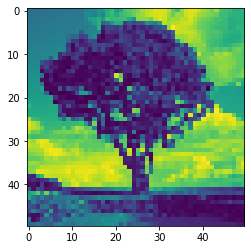

<IPython.core.display.Javascript object>

In [3]:
from PIL import Image

img = Image.open("../data/test/src_tree.jpg").convert("L")
img = img.resize((50, 50))
img = np.array(img)
img = (img-np.mean(img))/np.std(img)
plt.imshow(img)


In [4]:
test = np.random.uniform(-1, 1, img.shape)
tmp = np.random.uniform(-1, 1, (3, 3))

<IPython.core.display.Javascript object>

In [5]:
pp = gradient_descent(
    phi_0=test,
    w0=img,
    u=img,
    step_w=0.01,
    step_phi=10,
    trhld=0.1,
    eps=10,
    lambda_=1,
    mu=1,
    it=5,
    verbose=True,
)

1161
diff de w : 0.0
Gradient de phi : 26718.111286364983
291
diff de w : 0.0
Gradient de phi : 11144.02040279384
224
diff de w : 0.0
Gradient de phi : 0.0
224
diff de w : 0.0
Gradient de phi : 0.0
224
diff de w : 0.0
Gradient de phi : 0.0



<IPython.core.display.Javascript object>

In [8]:
for i in range(pp[1].shape[0]):
    for j in range(pp[1].shape[1]):
        if pp[1][i, j] > 0:
            pp[1][i, j] = 1
        else:
            pp[1][i, j] = 0

<IPython.core.display.Javascript object>

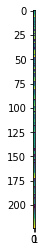

<IPython.core.display.Javascript object>

In [7]:
plt.imshow(pp[])

In [7]:
np.argwhere(pp[1] >= 0).tolist()

[[10, 22],
 [11, 15],
 [11, 16],
 [11, 17],
 [11, 21],
 [11, 22],
 [13, 14],
 [13, 15],
 [13, 16],
 [13, 17],
 [14, 13],
 [14, 16],
 [14, 17],
 [15, 14],
 [15, 24],
 [16, 17],
 [17, 18],
 [18, 18],
 [18, 24],
 [20, 19],
 [21, 19],
 [22, 36],
 [22, 38],
 [22, 40],
 [23, 19],
 [23, 24],
 [23, 33],
 [23, 40],
 [23, 42],
 [23, 43],
 [23, 44],
 [24, 19],
 [24, 44],
 [25, 24],
 [25, 29],
 [25, 35],
 [26, 19],
 [26, 24],
 [26, 27],
 [26, 50],
 [26, 51],
 [27, 18],
 [27, 19],
 [27, 20],
 [27, 40],
 [27, 42],
 [27, 46],
 [27, 50],
 [27, 52],
 [27, 53],
 [28, 18],
 [28, 23],
 [28, 30],
 [28, 53],
 [29, 24],
 [29, 53],
 [29, 54],
 [29, 55],
 [30, 28],
 [30, 43],
 [30, 44],
 [30, 55],
 [31, 28],
 [31, 31],
 [31, 33],
 [31, 51],
 [31, 57],
 [31, 58],
 [32, 17],
 [32, 27],
 [32, 28],
 [32, 31],
 [32, 49],
 [32, 57],
 [33, 17],
 [33, 49],
 [33, 50],
 [33, 58],
 [33, 59],
 [34, 32],
 [34, 43],
 [34, 58],
 [35, 16],
 [35, 20],
 [35, 27],
 [35, 49],
 [35, 59],
 [36, 16],
 [36, 17],
 [36, 19],
 [36, 28],

<IPython.core.display.Javascript object>

In [30]:
positive_part = np.argwhere(phi >= 0).tolist()

NameError: name 'phi' is not defined

<IPython.core.display.Javascript object>

In [20]:
z = get_frontier(image=img, omega=pp, neighborhood_type="4_connex")

<IPython.core.display.Javascript object>

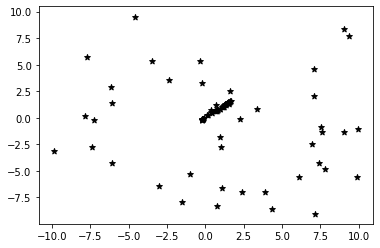

<IPython.core.display.Javascript object>

In [16]:
for i in range(len(pp)):
    plt.scatter(pp[i][0], pp[i][1], color="black", marker="*")
